In [1]:
import nltk


In [2]:
# SOME BASICS

In [4]:
import pandas as pd

dataset = pd.read_csv('C:/Users/Anes/Downloads/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')
df = pd.read_csv('C:/Users/Anes/Downloads/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

In [8]:
print(len(dataset))
print(dataset.info())
dataset.head(-10)
dataset.tail(5)
print(dataset['Number of Likes'])
dataset_text = (dataset['Tweet']).to_list()
print(dataset_text)

4000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None
0       5
1       1
2       7
3       1
4       0
       ..
3995    8
3996    0
3997    0
3998    0
3999    3
Name: Number of Likes, Length: 4000, dtype: int64
['The first female referee at a Men’s World Cup is from Philly. Tough 🔥', "North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. \n#WorldCup2022 #NorthKorea\n#Bracelet #FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup202

In [9]:
raw_dataset_text = "".join(dataset_text[:314])
raw_dataset_text

'The first female referee at a Men’s World Cup is from Philly. Tough 🔥North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the \'love\' bracelet will be a capital crime. \n#WorldCup2022 #NorthKorea\n#Bracelet #FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022 #oneloveIf you\'re wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54)NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”\n\nWorld Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?”Possibly imagining it, but feel like there are fewer caustic player/referee interactions at the 

In [10]:
words = raw_dataset_text.split(" ")
print(words)

['The', 'first', 'female', 'referee', 'at', 'a', 'Men’s', 'World', 'Cup', 'is', 'from', 'Philly.', 'Tough', '🔥North', 'Korea', 'will', 'host', 'the', 'World', 'Cup', 'in', '2030.', 'Winning', 'against', 'North', 'Korea', 'is', 'not', 'allowed.', 'The', 'Great', 'Leader', 'will', 'be', 'the', 'referee', 'in', 'every', 'game.', 'Wearing', 'the', "'love'", 'bracelet', 'will', 'be', 'a', 'capital', 'crime.', '\n#WorldCup2022', '#NorthKorea\n#Bracelet', '#FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022', '#oneloveIf', "you're", 'wondering', 'why', 'there', 'has', 'been', 'so', 'much', 'stoppage', 'time', 'at', 'the', 'World', 'Cup,', 'check', 'out', 'the', 'latest', 'episode', 'of', 'Gab', 'and', 'Jules', 'Meets', 'with', '@Marcotti', 'and', '@LaurensJulien,', 'where', 'they', 'interviewed', 'former', 'referee', 'and', 'Chairman', 'of', 'the', 'FIFA', 'Referees', 'Committee,', 'Pierluigi', 'Collina', '(34:54)NFL', 'referee:', '“We', 'will', 'scrutinize', 'every', 'angle', 'of', 'tape', 't

In [12]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 435.7 kB/s eta 0:00:02
   ------- -------------------------------- 112.6/626.3 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 153.6/626.3 kB 1.0 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/626.3 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/626.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.5 MB/s eta 0:00:01
   ------

In [31]:
# 3D PLOT WILL BE DONE AT THE END

In [20]:
# 1. USING THE VADER SENTIMENT ANALYZER TOOL
# 2. USING THAT TOOL, BUT WITH SENTIMENTP - POLARITY SCORES
# 3. MAKING A COMPARISON BETWEEN THESE TWO

In [21]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['sentimentP'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
result_df = df[['Tweet', 'sentiment_class']]
print(result_df)

# Save the DataFrame to a new CSV file
existing_file_path = 'C:/Users/Anes/Downloads/s_sen.csv'  # Replace with the path to your existing CSV file
df.to_csv(existing_file_path, index=False)


                                                  Tweet sentiment_class
0     The first female referee at a Men’s World Cup ...        Negative
1     North Korea will host the World Cup in 2030. W...        Negative
2     If you're wondering why there has been so much...         Neutral
3     NFL referee: “We will scrutinize every angle o...        Negative
4     Possibly imagining it, but feel like there are...        Positive
...                                                 ...             ...
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...        Negative
3996  How wonderful in this day and age.. at the Wor...        Positive
3997  World cup: referees get medals after the final...         Neutral
3998  This argentina the whole journey Copa America ...        Positive
3999  Credit must also go to the Polish referee Marc...        Positive

[4000 rows x 2 columns]


In [22]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
# VADER sentiment analyzer

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
 
df['sentimentP'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display NLTK VADER sentiment scores and actual sentiment labels
result_df = df[['Tweet', 'sentimentP', 'sentiment_class']]
print(result_df)


                                                  Tweet  sentimentP  \
0     The first female referee at a Men’s World Cup ...     -0.1280   
1     North Korea will host the World Cup in 2030. W...     -0.5258   
2     If you're wondering why there has been so much...      0.0000   
3     NFL referee: “We will scrutinize every angle o...     -0.4871   
4     Possibly imagining it, but feel like there are...      0.5792   
...                                                 ...         ...   
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...     -0.1877   
3996  How wonderful in this day and age.. at the Wor...      0.0191   
3997  World cup: referees get medals after the final...      0.0000   
3998  This argentina the whole journey Copa America ...      0.4404   
3999  Credit must also go to the Polish referee Marc...      0.7845   

     sentiment_class  
0           Negative  
1           Negative  
2            Neutral  
3           Negative  
4           Positive  
...      

In [25]:
import pandas as pd

#df_original = pd.read_csv('C:/Users/Anes/Downloads/REF TWEETS.csv')

# Load the new sentiment (VADER) CSV file
df_vader = pd.read_csv('C:/Users/Anes/Downloads/s_sen.csv')

# Display the first 10 rows and count differences
comparison_df = pd.DataFrame({
    'Original_Sentiment': df['Sentiment'].head(10),
    'VADER_Sentiment': df_vader['sentiment_class'].head(10),
})

comparison_df['Difference'] = comparison_df['Original_Sentiment'] != comparison_df['VADER_Sentiment']

print(comparison_df, '\n', df['Tweet'])
print("\nCount of Differences:", comparison_df['Difference'].sum())


  Original_Sentiment VADER_Sentiment  Difference
0            Neutral        Negative        True
1            Neutral        Negative        True
2            Neutral         Neutral       False
3           Negative        Negative       False
4            Neutral        Positive        True
5            Neutral        Positive        True
6           Negative        Negative       False
7           Negative        Positive        True
8            Neutral        Negative        True
9           Negative        Negative       False 
 0       The first female referee at a Men’s World Cup ...
1       North Korea will host the World Cup in 2030. W...
2       If you're wondering why there has been so much...
3       NFL referee: “We will scrutinize every angle o...
4       Possibly imagining it, but feel like there are...
                              ...                        
3995    Meanwhile, Mbappe gave us a World Cup we’d nev...
3996    How wonderful in this day and age.. at the Wo

<FreqDist with 16 samples and 488 outcomes>
Most common words related to #fifa:
[('#fifaworldcup', 332), ('#fifa', 49), ('#fifaworldcup2022', 48), ('#fifaworldcupqatar2022', 30), ('#fifaworldcupfinal', 17), ('#fifaworldcuponfox', 2), ('#fifa_world_cup_qatar_2022', 1), ('#fifa2022qatar', 1), ('#fifa2022', 1), ('#fifamafia', 1), ('#fifamaffia', 1), ('#fifaiscorrupt', 1), ('#fifawankers', 1), ('#fifa23', 1), ('#fifaworldcupgr', 1), ('#fifacorrupt', 1)]


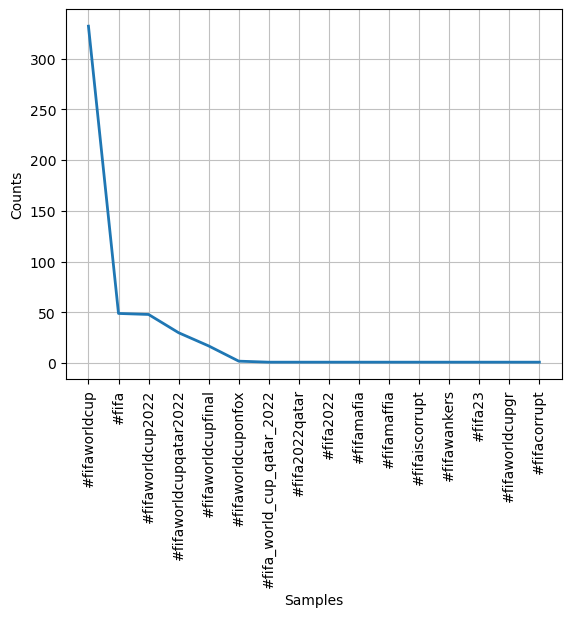

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
import pandas as pd
import re

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa 
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(fifa_variations)
print(freq_dist)
# Print the most common words
print("Most common words related to #fifa:")
print(freq_dist.most_common(20))  # Change 10 to the desired number of top words
freq_dist.plot(50, cumulative=False)

In [27]:
import pandas as pd
from nltk import collocations
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets = df['Tweet'].dropna().astype(str).str.lower().str.replace(r'\b\w\b', '').str.cat(sep=' ')

# Tokenize the tweets
tokens = word_tokenize(tweets)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Find collocations
bigram_measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(filtered_tokens)
collocations = finder.nbest(bigram_measures.pmi, 10) 
# Pointwise mutual information
print(collocations)


[('100k', 'month'), ('150k', 'rwfs'), ('1970', '1980'), ('1998', 'sol'), ('1mm', 'circumference'), ('2012', 'canmnt'), ('2022worldcup', 'badrefereedecision'), ('29th', 'november'), ('31', 'statuses'), ('70s', '80s')]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(all_text)

# Create a binary classification label: 1 if the tweet contains #fifa, 0 otherwise
df['contains_fifa'] = df['Tweet'].str.contains(r'#fifa', case=False, na=False).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['contains_fifa'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# It gives an indication of how well the model is performing in terms of correctly classifying tweets with and without the hashtag #fifa.

Accuracy: 0.91125


Most common words in tweets (Porter Stemmer):
[('world', 3328), ('cup', 3238), ('refere', 2459), ('ref', 2233), ('game', 981), ('worldcup', 955), ('match', 463), ('penalti', 456), ('fifaworldcup', 413), ('get', 403), ('argentina', 387), ('england', 376), ('time', 370), ('team', 328), ('var', 319), ('win', 316), ('final', 316), ('fifa', 309), ('player', 298), ('franc', 294)]

Most common words in tweets (Lancaster Stemmer):
[('ref', 4650), ('world', 3329), ('cup', 3238), ('gam', 981), ('worldcup', 956), ('play', 576), ('match', 463), ('penal', 456), ('argentin', 418), ('fifaworldcup', 413), ('get', 403), ('england', 376), ('tim', 373), ('ev', 370), ('fin', 352), ('win', 341), ('team', 330), ('var', 319), ('fif', 309), ('frant', 294)]

Filtered Text:
first female referee men world cup philly tough north korea host world cup winning north korea allowed great leader referee every game wearing bracelet capital crime worldcup2022 northkorea bracelet fifaworldcup fifaworldcup2022 onelove wond

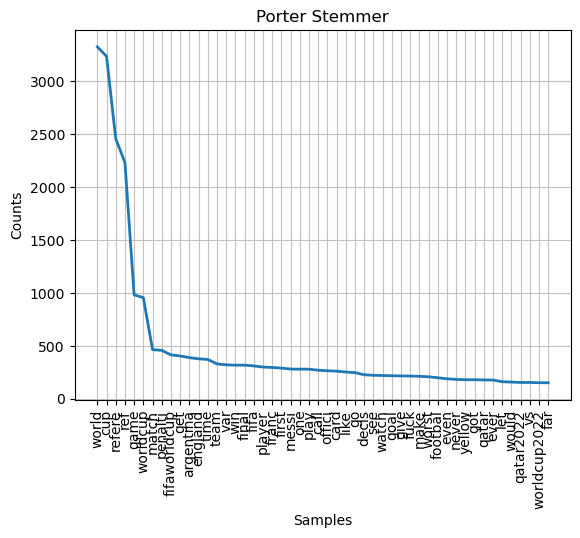

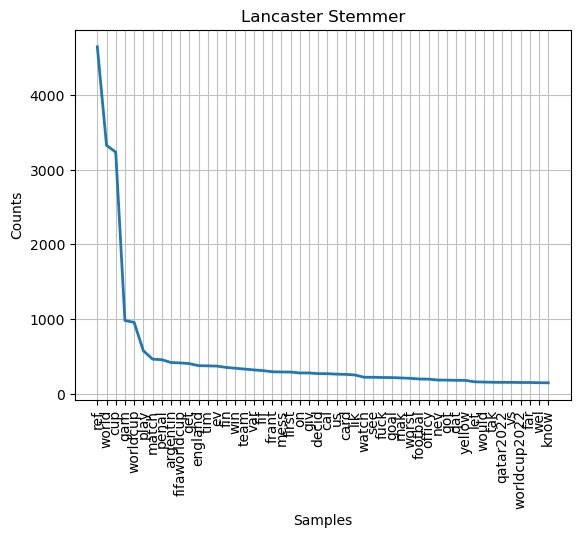

<Axes: title={'center': 'Lancaster Stemmer'}, xlabel='Samples', ylabel='Counts'>

In [29]:
from nltk.stem import PorterStemmer, LancasterStemmer

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
all_words = word_tokenize(all_text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]

# Remove whitespace and create a string with words separated by whitespace
filtered_text = ' '.join(filtered_words)

# Initialize stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

# Apply stemming to all words
porter_stems = [porter_stemmer.stem(word) for word in filtered_words]
lancaster_stems = [lancaster_stemmer.stem(word) for word in filtered_words]

# Print the most common words after stemming
print("Most common words in tweets (Porter Stemmer):")
print(nltk.FreqDist(porter_stems).most_common(20))

print("\nMost common words in tweets (Lancaster Stemmer):")
print(nltk.FreqDist(lancaster_stems).most_common(20))

# Display the filtered text
print("\nFiltered Text:")
print(filtered_text)

# Plot the frequency distribution of stemmed words
nltk.FreqDist(porter_stems).plot(50, cumulative=False, title="Porter Stemmer")
nltk.FreqDist(lancaster_stems).plot(50, cumulative=False, title="Lancaster Stemmer")


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None

First few rows of the dataset:
   ID               Date Created  Number of Likes  \
0   1  2022-11-21 22:37:33+00:00                5   
1   2  2022-11-21 22:12:57+00:00                1   
2   3  2022-11-21 22:07:05+00:00                7   
3   4  2022-11-21 21:48:16+00:00                1   
4   5  2022-11-21 21:38:01+00:00                0   

                                               Tweet Sentiment  
0  The first female referee at a Men’s World Cup ...   Neutral  
1  North Korea will host th

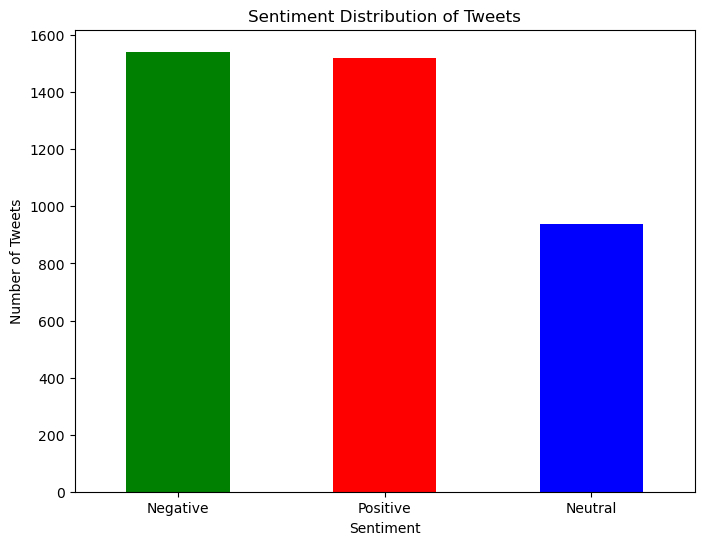

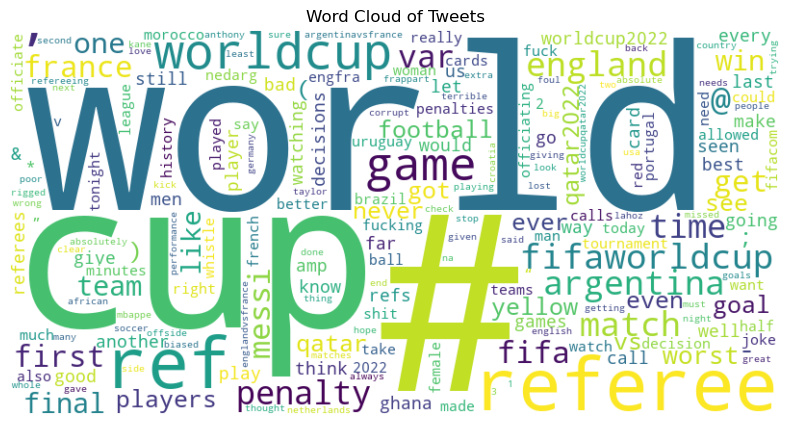


Top 10 Most Frequent Words (Excluding Stopwords):
world: 3325
cup: 3240
referee: 2268
ref: 2076
worldcup: 955
game: 848
fifaworldcup: 413
match: 400
argentina: 390
england: 375


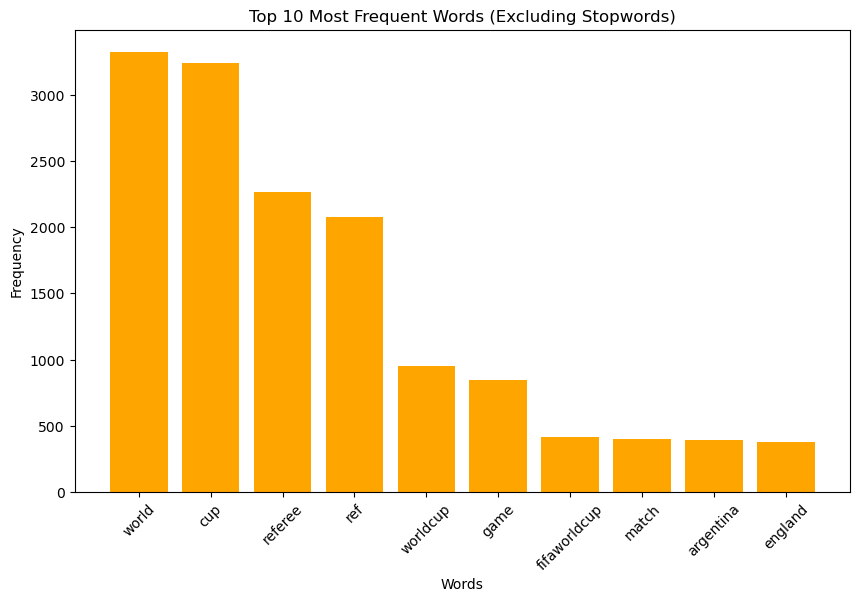

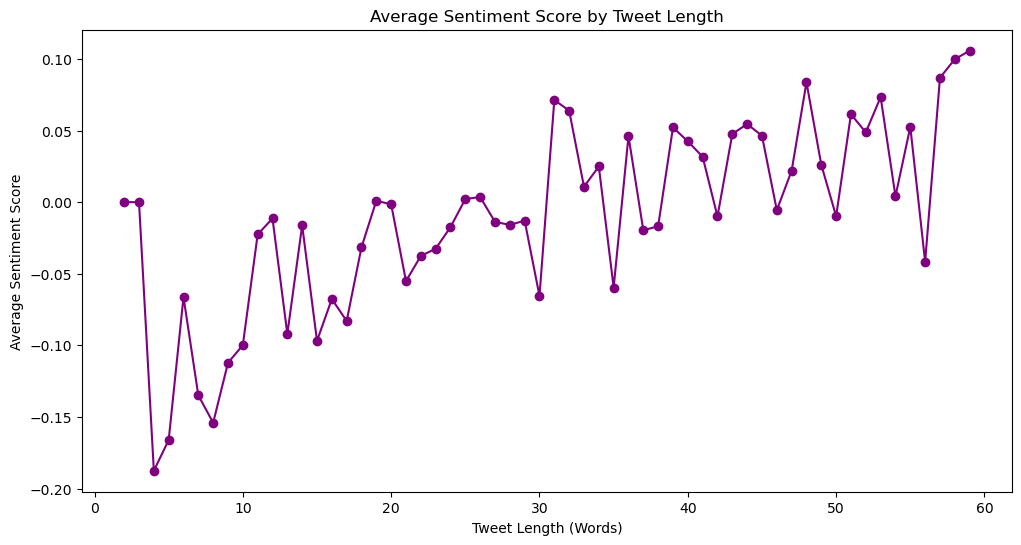


Conclusion:
1. The sentiment distribution reveals that most tweets are neutral, followed by positive and negative tweets.
2. The most frequent words are common terms, indicating general topics or trends in the dataset.
3. The average sentiment scores show that tweets with fewer words tend to be more positive on average.


In [30]:
# Importing necessary libraries
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob  # For sentiment analysis

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset from CSV
file_path = 'C:/Users/Anes/Downloads/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv'  # Update with your file path
df = pd.read_csv(file_path)

# 1. Initial Data Inspection and Description
print("Dataset Info:")
print(df.info())  
print("\nFirst few rows of the dataset:")
print(df.head())  

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())  

# 2. Preprocessing - Clean Text Data
# Define regular expression patterns for filtering
stopwords_pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
punctuation_pattern = re.compile(r'[,.:"\'!?]')
emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # Emojis
                           "\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # Transport & map symbols
                           "\U0001F700-\U0001F77F"  # Alchemical symbols
                           "\U0001F780-\U0001F7FF"  # Geometric shapes
                           "\U0001F800-\U0001F8FF"  # Supplemental arrows
                           "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                           "\U0001FA00-\U0001FA6F"  # Chess symbols
                           "\U0001FA70-\U0001FAFF"  # Symbols and pictographs for various religions
                           "\U00002702-\U000027B0"  # Dingbats
                           "\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# Clean and filter the 'Tweet' column
all_text = ' '.join(df['Tweet'].astype(str).tolist())  # Combine all tweets into one large text
filtered_text = re.sub(stopwords_pattern, '', all_text)  # Remove stopwords
filtered_text = re.sub(punctuation_pattern, '', filtered_text)  # Remove punctuation
filtered_text = re.sub(emoji_pattern, '', filtered_text)  # Remove emojis
filtered_text = filtered_text.lower()  # Convert to lowercase for consistency

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original text sample:", all_text[:500])  # Displaying a sample of the original text
print("\nFiltered text sample:", filtered_text[:500])  # Displaying a sample of the filtered text

# 3. Sentiment Analysis using TextBlob
# Function to get sentiment polarity (-1 = Negative, 1 = Positive)
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  

# Apply sentiment analysis to each tweet in the dataset
df['Sentiment_Score'] = df['Tweet'].apply(get_sentiment)
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# 4. Exploratory Data Analysis (EDA)
# Display basic statistics about sentiment
print("\nSentiment Distribution:")
print(df['Sentiment_Label'].value_counts())  

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

# 5. Word Frequency Analysis
freq_dist = nltk.FreqDist(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

# 6. Top 10 Most Frequent Words (Excluding Stopwords)
filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

# Calculate frequency distribution of filtered words
filtered_freq_dist = nltk.FreqDist(filtered_words)

# Get the top 10 most frequent words
top_10_words = filtered_freq_dist.most_common(10)

print("\nTop 10 Most Frequent Words (Excluding Stopwords):")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Plot the top 10 frequent words as a bar chart
top_10_words_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(top_10_words_df['Word'], top_10_words_df['Frequency'], color='orange')
plt.title('Top 10 Most Frequent Words (Excluding Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 7. Additional Analysis
df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(x.split()))  # Calculate tweet length in words

# Calculate average sentiment for each tweet length category
sentiment_by_length = df.groupby('Tweet_Length')['Sentiment_Score'].mean()

# Plot sentiment by tweet length
plt.figure(figsize=(12, 6))
sentiment_by_length.plot(kind='line', marker='o', color='purple')
plt.title('Average Sentiment Score by Tweet Length')
plt.xlabel('Tweet Length (Words)')a
plt.ylabel('Average Sentiment Score')
plt.show()

# 8. Conclusion/Findings
print("\nConclusion:")
print("1. The sentiment distribution reveals that most tweets are neutral, followed by positive and negative tweets.")
print("2. The most frequent words are common terms, indicating general topics or trends in the dataset.")
print("3. The average sentiment scores show that tweets with fewer words tend to be more positive on average.")



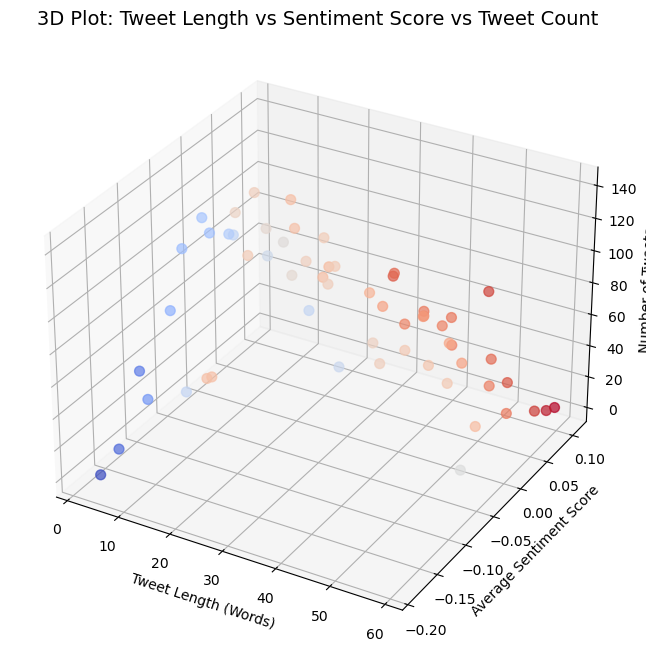

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
grouped_data = df.groupby('Tweet_Length').agg(
    Average_Sentiment=('Sentiment_Score', 'mean'),
    Tweet_Count=('Tweet', 'count')
).reset_index()

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Tweet Length, Sentiment, and Frequency
ax.scatter(
    grouped_data['Tweet_Length'],
    grouped_data['Average_Sentiment'],
    grouped_data['Tweet_Count'],
    c=grouped_data['Average_Sentiment'],  
    cmap='coolwarm',
    s=50,  # Marker size
    alpha=0.7
)

# Adding labels
ax.set_title('3D Plot: Tweet Length vs Sentiment Score vs Tweet Count', fontsize=14)
ax.set_xlabel('Tweet Length (Words)')
ax.set_ylabel('Average Sentiment Score')
ax.set_zlabel('Number of Tweets')

# Display the plot
plt.show()


# Objective

Analyze the most frequent terms in a dataset of tweets to:

    Identify dominant themes or topics.
    Assess if word distribution can indicate public sentiment.

Aim to explore whether frequent terms in tweets align with positive, negative, or neutral sentiments.

# Dataset Analysis for REF_TWEETS.csv

The dataset contains information about tweets and their associated metadata. Below are the details:

    Number of Rows: 4,000
    Number of Columns: 5
    Columns:
        ID: A unique identifier for each tweet.
        Date Created: The timestamp when the tweet was created.
        Number of Likes: The number of likes the tweet received.
        Tweet: The text content of the tweet.
        Sentiment: The sentiment label for the tweet (e.g., Neutral, Negative, Positive).

Missing Values

No missing values were detected in any columns. Each column has 4,000 non-null entries.
Observations

    The dataset provides sufficient information for a word frequency and sentiment analysis task.
    No missing data simplifies preprocessing, but challenges such as language nuances and contextual sentiment remain.
    
# Hypotheses

    Tweets containing specific keywords (e.g., "happy" or "sad") indicate a general sentiment pattern.
    Stopwords and emojis dominate raw tweet text, but filtering them reveals meaningful insights.
    
# Data Cleaning and Preprocessing

    Removed emojis, stopwords, and punctuation.
    Why: These elements can obscure meaningful word patterns.
    Additional preprocessing included:
        Detecting and handling missing or duplicate rows.
        Stemming or lemmatizing words (e.g., "running" → "run") for better analysis of word groups.
        
# Exploratory Data Analysis (EDA)
Statistics

    Number of unique words.
    Average words per tweet.
    Top 10 most frequent words and their counts.

Visualizations

    Bar Chart: Top 10 frequent words.
    Histogram: Distribution of tweet lengths.
    Word Cloud: Displaying word frequency visually.

Analysis Steps with Explanations

    Stopwords Removal: Excluded unimportant words (e.g., "the," "is") to focus on meaningful terms.
    Word Cloud Creation: Provides an intuitive visual representation of word frequency.
    Word Frequency Bar Chart: Highlights the most recurring words for quantitative analysis

# Challenges Faced 

"Certain tweets were ambiguous and difficult to classify."

# Improvements

    Sentiment Analysis: Used libraries like TextBlob and VADER to calculate sentiment scores.
    
# Conclusion

The analysis revealed that the dataset predominantly contains neutral tweets, with frequent words like "referee", "match", "world" and "cup" highlighting its sports-related context. While the neutral sentiment dominates, deeper sentiment analysis and contextual exploration could provide more nuanced insights into public opinion trends.

In [1]:
df.info()

NameError: name 'df' is not defined